In [2]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import fix_yahoo_finance as yf

now = datetime.datetime.now()
now2 = now.strftime('%Y-%m-%d')

# Most active options
actives = pd.read_csv('active_options.csv')

top = pd.DataFrame(actives.loc[:100])

symbol_list = [x for x in top.Symbol]

main_df = pd.DataFrame()

In [3]:
# Figure out how to pickle this so you don't have to do it every time.

for sym in symbol_list:
    
    try:
        df = yf.download(sym, '2000-1-1', now)
        
    except ValueError:
        pass
    
    print(sym)
    
    #df.set_index('Date', inplace=True) 

    df.rename(columns = {'Adj Close': sym}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
    
    if main_df.empty:
        main_df = df
        
    else:
        main_df = main_df.join(df, how='outer', on='Date')    


[*********************100%***********************]  1 of 1 downloaded
RIG
[*********************100%***********************]  1 of 1 downloaded
AAPL
[*********************100%***********************]  1 of 1 downloaded
BAC
[*********************100%***********************]  1 of 1 downloaded
MU
[*********************100%***********************]  1 of 1 downloaded
BABA
[*********************100%***********************]  1 of 1 downloaded
NFLX
[*********************100%***********************]  1 of 1 downloaded
AAL
[*********************100%***********************]  1 of 1 downloaded
T
[*********************100%***********************]  1 of 1 downloaded
GE
[*********************100%***********************]  1 of 1 downloaded
AMZN
[*********************100%***********************]  1 of 1 downloaded
FB
[*********************100%***********************]  1 of 1 downloaded
TSLA
[*********************100%***********************]  1 of 1 downloaded
TWTR
[*********************100%***********

In [12]:
df_corr = main_df.corr()

shittylist = []
othershittylist = []

for x in top.Symbol:
    
    """
    print(x)
    print(np.sum(df_corr[x]))
    print(np.sum(df_corr[x]) - 1.0)
    print((np.sum(df_corr[x]) - 1.0) / (len(df_corr) - 1.0)) # "Avg correlation"
    print(abs((np.sum(df_corr[x]) - 1.0) / (len(df_corr) - 1.0))) # Abs avg correlation
    """
    
    shittylist.append((np.sum(df_corr[x]) - 1.0) / (len(df_corr) - 1.0))
    othershittylist.append(abs((np.sum(df_corr[x]) - 1.0) / (len(df_corr) - 1.0)))


top['avg_corr'] = shittylist
top['abs'] = othershittylist

top_uncorr = top.sort_values(by = 'abs')
print(top_uncorr)
#top_uncorr[:25].sort_values(by = 'Options Vol.', ascending=False) # This sorts by volume, which'd be nice.

    Symbol                                Name     Last  Change    %Chg  \
52       X            United States Steel Corp    36.28   -0.25  -0.68%   
21     PBR  Petroleo Brasileiro S.A. Petrobras    10.35   -0.32  -3.00%   
2      BAC                Bank of America Corp    28.68   -0.15  -0.52%   
97     CZR          Caesars Entertainment Corp    11.15   -0.25  -2.19%   
98     AKS               AK Steel Holding Corp     4.61   -0.10  -2.12%   
13     AMD                   Adv Micro Devices    16.27   -0.28  -1.69%   
12    TWTR                         Twitter Inc    43.87    0.12  +0.27%   
73     DVN                   Devon Energy Corp    44.12   -1.49  -3.27%   
20     CHK              Chesapeake Energy Corp     5.15   -0.25  -4.63%   
15     FCX                Freeport-Mcmoran Inc    17.41   -0.70  -3.87%   
59    KORS           Michael Kors Holdings Ltd    66.50   -0.81  -1.20%   
70       S                         Sprint Corp     5.50   -0.13  -2.31%   
8       GE            Gen

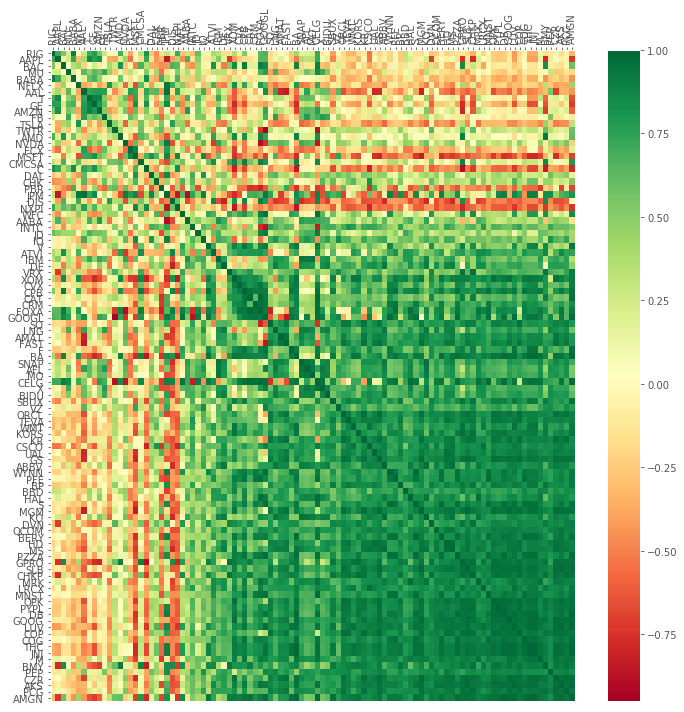

In [7]:
# Plot sorted data for fun

cs_ls = [x for x in top_uncorr.Symbol]

main_df_sorted = pd.DataFrame(columns = cs_ls)

for x in main_df_sorted:
    main_df_sorted[x] = main_df[x]

data = main_df_sorted.corr().values

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
fig.colorbar(heatmap)

ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = df_corr.columns
row_labels = df_corr.index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

plt.xticks(rotation=90)
#heatmap.set_clim(-1, 1)

plt.tight_layout()

# Sort main_df by symbols in corr_sorted, then do .corr()

#main_df
#main_df.corr()

In [8]:
# Weight by vol x uncorrelation... later

# Re-sort actives by uncorrelation, print the top 20

new_list = []

for x in cs_ls:
    
    #print(actives[actives['Symbol'] == x])
    new_list.append(actives[actives['Symbol'] == x].values[0])

new_actives = pd.DataFrame(new_list, columns = [x for x in actives])
#new_actives[:20]

In [13]:
print(actives)


                                                 Symbol  \
0                                                   RIG   
1                                                  AAPL   
2                                                   BAC   
3                                                    MU   
4                                                  BABA   
5                                                  NFLX   
6                                                   AAL   
7                                                     T   
8                                                    GE   
9                                                  AMZN   
10                                                   FB   
11                                                 TSLA   
12                                                 TWTR   
13                                                  AMD   
14                                                 NVDA   
15                                                  FCX 